In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from PySigmoid import *

from sklearn.datasets import make_circles

In [2]:
# set_posit_env(8, 0)

def posify(x):
    if type(x) == np.ndarray:
        if len(x.shape) == 1:
            return np.array([Posit(y) for y in x])
        else:
            return np.array([[Posit(z) for z in y] for y in x])
    else:
        return Posit(x)
    
def sigmoid(x):
    if type(x) == np.ndarray:
        if len(x.shape) == 1:
            return np.array([(y).sigmoid() for y in x])
        else:
            return np.array([[(z).sigmoid() for z in y] for y in x])
    else:
        return (x).sigmoid()
    
def sigmoid_derivative(x):
        return x * (1 - x)

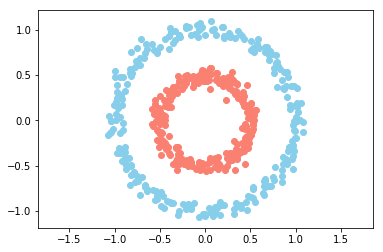

In [3]:
# CREATE THE DATASET

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

# X = posify(X)
# Y = posify(Y)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c='skyblue')
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c='salmon')
plt.axis('equal')
plt.show()

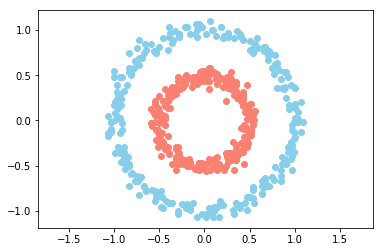

In [4]:
plt.scatter(posify(X[posify(Y[:,0]) == 0, 0]), posify(X[posify(Y[:,0]) == 0, 1]), c='skyblue')
plt.scatter(posify(X[posify(Y[:,0]) == 1, 0]), posify(X[posify(Y[:,0]) == 1, 1]), c='salmon')
plt.axis('equal')
plt.show()

In [5]:
# NEURAL LAYER CLASS

class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f, posit=False):
    np.random.seed(1)
    
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    if posit:
        self.b = posify(self.b)
        self.W = posify(self.W)

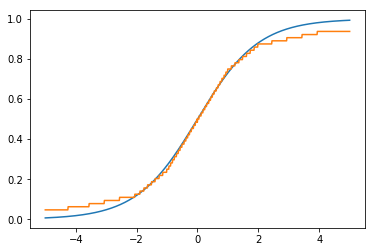

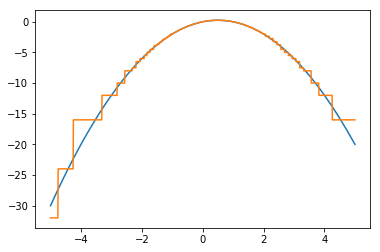

In [6]:
# ACTIVATION FUNCTIONS

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

sigm2 = (lambda x: sigmoid(x),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 1000)
plt.plot(_x, sigm[0](_x))
# plt.plot(_x, sigmoid(posify(_x)))
plt.plot(_x, sigm2[0](posify(_x)))

plt.figure()
plt.plot(_x, sigm[1](_x))
# plt.plot(_x, sigmoid(posify(_x)))
plt.plot(_x, sigm2[1](posify(_x)))

In [7]:
# CREATE THE NEURAL NETWORK

l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f, posit=False):
    nn = []
  
    for l, layer in enumerate(topology[:-1]):    
        nn.append(neural_layer(topology[l], topology[l+1], act_f, posit))
    
    return nn

In [8]:
# FUNCION DE ENTRENAMIENTO

topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)  
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):  
    out = [(None, X)]
  
    # Forward pass
    for l, layer in enumerate(neural_net):

        z = out[-1][1].dot(neural_net[l].W) + neural_net[l].b
        a = neural_net[l].act_f[0](z)

        out.append((z, a))

  
    if train:
        # Backward pass 
        deltas = []

        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]

            if l == len(neural_net) - 1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0].dot(_W.T) * neural_net[l].act_f[1](a))

            _W = neural_net[l].W

            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
            neural_net[l].W = neural_net[l].W - out[l][1].T.dot(deltas[0]) * lr
      
    return out[-1][1]
  
train(neural_net, X, Y, l2_cost, 0.5)
print("")

In [9]:
try:
    del(neural_net)
    del(neural_net_posit)
except NameError:
    pass

In [0]:
neural_net = create_nn(topology, sigm)
neural_net_posit = create_nn(topology, sigm2, posit=True)

In [0]:
train(neural_net, X, Y, l2_cost, 0.5)

In [0]:
train(neural_net_posit, posify(X), posify(Y), l2_cost, 0.5)

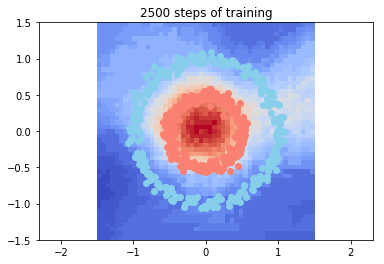

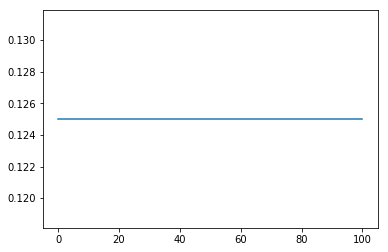

In [9]:
# VISUALIZATION & TEST

# import time
from IPython.display import clear_output

# neural_n = create_nn(topology, sigm)
set_posit_env(8, 0)
nn_posit = create_nn(topology, sigm2, posit=True)

loss = []

for i in range(2501):

    # Entrenemos a la red!
#     pY = train(neural_n, X, Y, l2_cost, lr=0.05)
    pY = train(nn_posit, posify(X), posify(Y), l2_cost, lr=0.05)

    if i % 25 == 0:
#         print(pY)

#         loss.append(l2_cost[0](pY, Y))
        loss.append(l2_cost[0](pY, posify(Y)))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
#                 _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
                _Y[i0, i1] = train(nn_posit, posify(np.array([[x0, x1]])), posify(Y), l2_cost, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
        plt.title('{} steps of training'.format(i))
        plt.savefig('8/{}.png'.format(i))
#         files.download('{}.png'.format(int(i/25)))
#         if i % 250 == 0:
#             plt.savefig('{}.png'.format(i//25))
#             files.download('{}.png'.format(i//25))
#             plt.savefig('0.png')
#             files.download('0.png')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
#         time.sleep(0.5)  

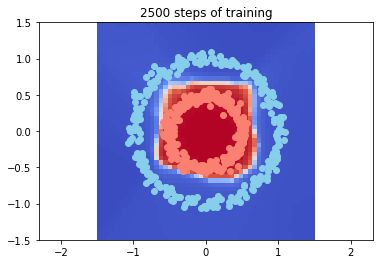

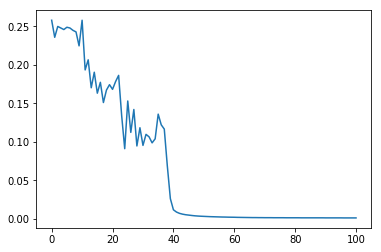

In [ ]:
# neural_n = create_nn(topology, sigm)
set_posit_env(16, 0)
nn_posit = create_nn(topology, sigm2, posit=True)

loss = []

for i in range(2501):

    # Entrenemos a la red!
#     pY = train(neural_n, X, Y, l2_cost, lr=0.05)
    pY = train(nn_posit, posify(X), posify(Y), l2_cost, lr=0.05)

    if i % 25 == 0:
#         print(pY)

#         loss.append(l2_cost[0](pY, Y))
        loss.append(l2_cost[0](pY, posify(Y)))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
#                 _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
                _Y[i0, i1] = train(nn_posit, posify(np.array([[x0, x1]])), posify(Y), l2_cost, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
        plt.title('{} steps of training'.format(i))
        plt.savefig('16/{}.png'.format(i))
#         files.download('{}.png'.format(int(i/25)))
#         if i % 250 == 0:
#             plt.savefig('{}.png'.format(i//25))
#             files.download('{}.png'.format(i//25))
#             plt.savefig('0.png')
#             files.download('0.png')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
#         time.sleep(0.5)  